In [408]:
import time
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import emoji
import nltk
import warnings
warnings.filterwarnings("ignore")

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [409]:
meals = pd.read_csv('data_hyderabad/data_preprocessed_classification.csv')

In [410]:
meals.head()

Restaurant                                             Review  \
0  Beyond Flavours  The ambience was good, food was quite good . h...   
1  Beyond Flavours  Ambience is too good for a pleasant evening. S...   
2  Beyond Flavours  A must try.. great food great ambience. Thnx f...   
3  Beyond Flavours  Soumen das and Arun was a great guy. Only beca...   
4  Beyond Flavours  Food is good. we ordered Kodi drumsticks and b...   

                                 Review_Preprocessed  \
0  [('ambience', 'NN'), ('good', 'JJ'), ('food', ...   
1  [('ambience', 'NN'), ('good', 'JJ'), ('pleasan...   
2  [('must', 'MD'), ('try', 'VB'), ('great', 'JJ'...   
3  [('soumen', 'NNP'), ('das', 'NNS'), ('arun', '...   
4  [('food', 'NN'), ('good', 'JJ'), ('ordered', '...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1  Chinese, Continental, Kebab, European, South I...   
2  Chinese, Continental, Kebab, European, South I...   
3  Chinese, Continental, Kebab, European, South I...   
4  Chinese, Continental, Kebab, European, South I...   

                                          meals  
0                                            []  
1                                            []  
2                       ['Penne Alfredo Pasta']  
3                                            []  
4  ['Kodi drumsticks', 'basket mutton biryani']

In [411]:
meals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9955 entries, 0 to 9954
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Restaurant           9955 non-null   object
 1   Review               9943 non-null   object
 2   Review_Preprocessed  9955 non-null   object
 3   Cuisines             9955 non-null   object
 4   meals                9955 non-null   object
dtypes: object(5)
memory usage: 389.0+ KB


In [412]:
meals['meals'] = meals['meals'].apply(lambda x: eval(x) if isinstance(x, str) else x)
meals_df = meals.explode('meals')

In [413]:
meals_df = meals_df.dropna(subset=['meals'])

In [414]:
meal_counts = meals_df['meals'].value_counts()


In [415]:
print(meal_counts)

chicken                                                                                                                                 658
biryani                                                                                                                                 459
rice                                                                                                                                    309
pizza                                                                                                                                   266
veg                                                                                                                                     223
fish                                                                                                                                    177
Biryani                                                                                                                                 168
coffee              

In [416]:
meals_df['meals'] = meals_df['meals'].apply(lambda x: x.lower())

In [417]:
meal_counts_lower = meals_df['meals'].value_counts()
print(meal_counts_lower)

chicken                                                                                                                                 750
biryani                                                                                                                                 627
rice                                                                                                                                    359
pizza                                                                                                                                   318
veg                                                                                                                                     257
fish                                                                                                                                    228
paneer                                                                                                                                  194
coffee              

In [418]:
meals_df = meals_df[meals_df['meals'].str.len() > 2]

In [419]:
meals_df.shape

(25449, 5)

In [420]:
meals_df = meals_df.drop_duplicates(subset=['meals'])

In [455]:
meals_df

KeyboardInterrupt: 

In [422]:
meals_ser = meals_df['meals']


In [423]:
meals_ser = meals_ser.str.lower()

In [424]:
import pandas as pd
pd.set_option('display.max_rows', None)
print(meals_ser)


2                                     penne alfredo pasta
4                                         kodi drumsticks
4                                   basket mutton biryani
7                                                    corn
7                                               tawa fish
7                                          basket biryani
7                                                 biryani
9                                  chili honey lotus stem
12                                                   soup
12                                     honey chilli lotus
13                                         ana kodiak fry
13                                        mutton biriyani
14                                      corn cheese balls
14                                           manchow soup
14                                paneer shashlik sizzler
14                                                sizzler
14                                                 paneer
15            

In [425]:

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [426]:
lemmatizer = WordNetLemmatizer()

meals_lemma = meals_ser.apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(x)]))

In [427]:
meals_ser.head(5000)

2                                     penne alfredo pasta
4                                         kodi drumsticks
4                                   basket mutton biryani
7                                                    corn
7                                               tawa fish
7                                          basket biryani
7                                                 biryani
9                                  chili honey lotus stem
12                                                   soup
12                                     honey chilli lotus
13                                         ana kodiak fry
13                                        mutton biriyani
14                                      corn cheese balls
14                                           manchow soup
14                                paneer shashlik sizzler
14                                                sizzler
14                                                 paneer
15            

In [428]:
meals_lemma

2                                     penne alfredo pasta
4                                          kodi drumstick
4                                   basket mutton biryani
7                                                    corn
7                                               tawa fish
7                                          basket biryani
7                                                 biryani
9                                  chili honey lotus stem
12                                                   soup
12                                     honey chilli lotus
13                                         ana kodiak fry
13                                        mutton biriyani
14                                       corn cheese ball
14                                           manchow soup
14                                paneer shashlik sizzler
14                                                sizzler
14                                                 paneer
15            

In [429]:
diff = meals_ser.compare(meals_lemma)

In [ ]:
diff

In [431]:
meals_lemma = meals_lemma.drop_duplicates()

IDEAS:

put into clusters like e.g. drink, dessert, main dish, soup (or more detailed)

In [432]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec
import numpy as np

meals_series = meals_df['meals'].dropna() 

# Step 1: Bag of Words
bow_vectorizer = CountVectorizer(ngram_range=(1, 2), token_pattern=r'\b\w+\b') 
meals_bow_matrix = bow_vectorizer.fit_transform(meals_series).toarray()

# TF-IDF
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), token_pattern=r'\b\w+\b')  
meals_tfidf_matrix = tfidf_vectorizer.fit_transform(meals_series).toarray()

#Doc2Vec (Word Embeddings)
tokenized_meals = [meal.split() for meal in meals_series]

w2v_model = Word2Vec(sentences=tokenized_meals, vector_size=500, window=7, min_count=1, workers=4, epochs=16)

meals_doc2vec_matrix = np.array([
    np.mean([w2v_model.wv[word] for word in meal], axis=0) 
    for meal in tokenized_meals
])

print("BoW Matrix Shape:", meals_bow_matrix.shape)
print("TF-IDF Matrix Shape:", meals_tfidf_matrix.shape)
print("Doc2Vec Matrix Shape:", meals_doc2vec_matrix.shape)


BoW Matrix Shape: (7197, 9994)
TF-IDF Matrix Shape: (7197, 9994)
Doc2Vec Matrix Shape: (7197, 500)


In [433]:
meals_df["word2vec_vectors"] = list(meals_doc2vec_matrix)
print(meals_df[["meals", "word2vec_vectors"]].head())


                   meals                                   word2vec_vectors
2    penne alfredo pasta  [0.054310482, 0.06303185, 0.06489395, 0.056338...
4        kodi drumsticks  [0.07268173, 0.08352109, 0.08812888, 0.0719984...
4  basket mutton biryani  [0.061977506, 0.06725103, 0.07436964, 0.059893...
7                   corn  [0.09324338, 0.10823865, 0.114384994, 0.098071...
7              tawa fish  [0.075541735, 0.08511827, 0.09001454, 0.078445...


In [434]:
from sklearn.cluster import KMeans
import pandas as pd

k = 16  

kmeans_tfidf = KMeans(n_clusters=k, random_state=39).fit(meals_tfidf_matrix)
meals_df['kmeans_tfidf_clusters'] = kmeans_tfidf.labels_

kmeans_bow = KMeans(n_clusters=k, random_state=39).fit(meals_bow_matrix)
meals_df['kmeans_bow_clusters'] = kmeans_bow.labels_

kmeans_doc2vec = KMeans(n_clusters=k, random_state=39).fit(meals_doc2vec_matrix)
meals_df['kmeans_doc2vec_clusters'] = kmeans_doc2vec.labels_

print(meals_df[['meals', 'kmeans_tfidf_clusters', 'kmeans_bow_clusters', 'kmeans_doc2vec_clusters']].head())

                   meals  kmeans_tfidf_clusters  kmeans_bow_clusters  \
2    penne alfredo pasta                     11                   13   
4        kodi drumsticks                     11                   13   
4  basket mutton biryani                      6                    1   
7                   corn                     13                   13   
7              tawa fish                     10                   13   

   kmeans_doc2vec_clusters  
2                        2  
4                        8  
4                       11  
7                        0  
7                        8  


In [435]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, adjusted_mutual_info_score

model_list = [
    ("KMeans TF-IDF", kmeans_tfidf, meals_tfidf_matrix),
    ("KMeans BoW", kmeans_bow, meals_bow_matrix),
    ("KMeans Doc2Vec", kmeans_doc2vec, meals_doc2vec_matrix)
]

def evaluate_clustering(model_list):
    results = []
    for model_name, model, matrix in model_list:
        inertia = model.inertia_ if hasattr(model, "inertia_") else None
        silhouette = silhouette_score(matrix, model.labels_)
        calinski_harabasz = calinski_harabasz_score(matrix, model.labels_)
        results.append((model_name, inertia, silhouette, calinski_harabasz))
        print(f"Model: {model_name}")
        print(f"  Inertia: {inertia}")
        print(f"  Silhouette Score: {silhouette}")
        print(f"  Calinski-Harabasz Index: {calinski_harabasz}\n")
    return results

clustering_results = evaluate_clustering(model_list)


Model: KMeans TF-IDF
  Inertia: 6938.104059072617
  Silhouette Score: 0.012672028924714937
  Calinski-Harabasz Index: 16.58666132726099

Model: KMeans BoW
  Inertia: 24244.00096576316
  Silhouette Score: -0.18791768043643572
  Calinski-Harabasz Index: 27.939783951234993

Model: KMeans Doc2Vec
  Inertia: 15.969929695129395
  Silhouette Score: 0.45958012342453003
  Calinski-Harabasz Index: 69016.09968920996



In [436]:
metrics_df = pd.DataFrame(clustering_results, columns=["Model", "Inertia", "Silhouette Score", "Calinski-Harabasz Index"])
print(metrics_df)

ami_matrix = np.array([[adjusted_mutual_info_score(model1.labels_, model2.labels_)
                        for _, model2, _ in model_list] for _, model1, _ in model_list])
ami_df = pd.DataFrame(ami_matrix, columns=[m[0] for m in model_list], index=[m[0] for m in model_list])

print("\nAdjusted Mutual Information Matrix:")
print(ami_df)


            Model       Inertia  Silhouette Score  Calinski-Harabasz Index
0   KMeans TF-IDF   6938.104059          0.012672                16.586661
1      KMeans BoW  24244.000966         -0.187918                27.939784
2  KMeans Doc2Vec     15.969930          0.459580             69016.099689

Adjusted Mutual Information Matrix:
                KMeans TF-IDF  KMeans BoW  KMeans Doc2Vec
KMeans TF-IDF        1.000000    0.303313        0.189998
KMeans BoW           0.303313    1.000000        0.119632
KMeans Doc2Vec       0.189998    0.119632        1.000000


Doc2Vec Matrix


100%|██████████| 25/25 [00:17<00:00,  1.41it/s]


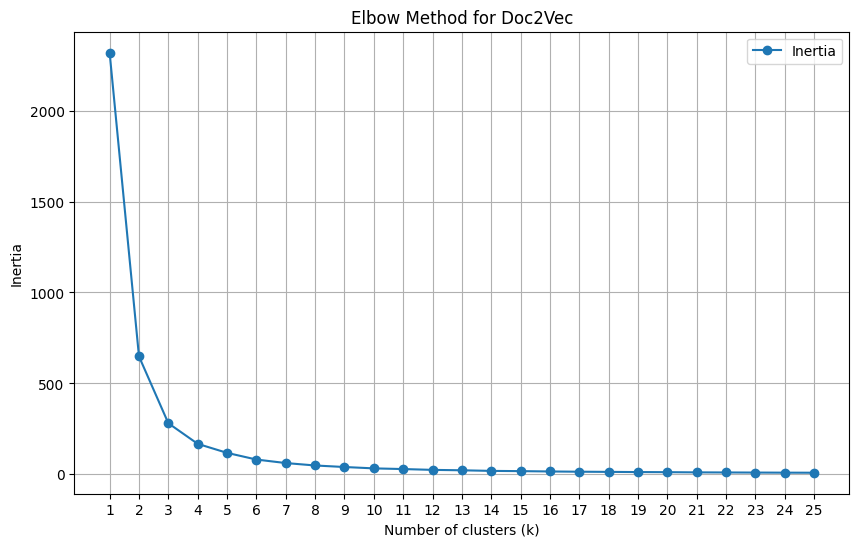

In [437]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from tqdm import tqdm

def inertia_plotter(matrix, max_k=50, title="Elbow Method for Optimal k"):
    x_k = []
    y_inertia = []

    for k in tqdm(range(1, max_k + 1)):
        kmeans = KMeans(n_clusters=k, random_state=42).fit(matrix)
        x_k.append(k)
        y_inertia.append(kmeans.inertia_)

    plt.figure(figsize=(10, 6))
    plt.plot(x_k, y_inertia, marker="o", label="Inertia")
    plt.xlabel("Number of clusters (k)")
    plt.ylabel("Inertia")
    plt.title(title)
    plt.xticks(range(1, max_k + 1))
    plt.grid()
    plt.legend()
    plt.show()

print("Doc2Vec Matrix")
inertia_plotter(meals_doc2vec_matrix, max_k=25, title="Elbow Method for Doc2Vec")


In [456]:
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

n_components = 80 

# TruncatedSVD on Doc2Vec
lsa = TruncatedSVD(n_components=n_components)
lsa_result = lsa.fit_transform(meals_doc2vec_matrix)

explained_variance = lsa.explained_variance_ratio_
cumulative_variance = explained_variance.sum()

optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42).fit(lsa_result)
sil_score = silhouette_score(lsa_result, kmeans.labels_)

print(f"Cumulative Explained Variance with {n_components} components: {cumulative_variance:.4f}")
print(f"Silhouette Score with {n_components} components: {sil_score:.4f}")


Cumulative Explained Variance with 80 components: 0.9993
Silhouette Score with 80 components: 0.6026


In [439]:
from sklearn.cluster import KMeans

kmeans_lsa = KMeans(n_clusters=16, random_state=42).fit(lsa_result)

meals_df["kmeans_lsa_clusters"] = kmeans_lsa.labels_

print(meals_df[["meals", "kmeans_lsa_clusters"]].head())


                   meals  kmeans_lsa_clusters
2    penne alfredo pasta                    9
4        kodi drumsticks                   10
4  basket mutton biryani                    0
7                   corn                    7
7              tawa fish                    4


In [440]:
meals_df.head()


Restaurant                                             Review  \
2  Beyond Flavours  A must try.. great food great ambience. Thnx f...   
4  Beyond Flavours  Food is good. we ordered Kodi drumsticks and b...   
4  Beyond Flavours  Food is good. we ordered Kodi drumsticks and b...   
7  Beyond Flavours  Well after reading so many reviews finally vis...   
7  Beyond Flavours  Well after reading so many reviews finally vis...   

                                 Review_Preprocessed  \
2  [('must', 'MD'), ('try', 'VB'), ('great', 'JJ'...   
4  [('food', 'NN'), ('good', 'JJ'), ('ordered', '...   
4  [('food', 'NN'), ('good', 'JJ'), ('ordered', '...   
7  [('well', 'RB'), ('reading', 'VBG'), ('many', ...   
7  [('well', 'RB'), ('reading', 'VBG'), ('many', ...   

                                            Cuisines                  meals  \
2  Chinese, Continental, Kebab, European, South I...    penne alfredo pasta   
4  Chinese, Continental, Kebab, European, South I...        kodi drumsticks   
4  Chinese, Continental, Kebab, European, South I...  basket mutton biryani   
7  Chinese, Continental, Kebab, European, South I...                   corn   
7  Chinese, Continental, Kebab, European, South I...              tawa fish   

                                    word2vec_vectors  kmeans_tfidf_clusters  \
2  [0.054310482, 0.06303185, 0.06489395, 0.056338...                     11   
4  [0.07268173, 0.08352109, 0.08812888, 0.0719984...                     11   
4  [0.061977506, 0.06725103, 0.07436964, 0.059893...                      6   
7  [0.09324338, 0.10823865, 0.114384994, 0.098071...                     13   
7  [0.075541735, 0.08511827, 0.09001454, 0.078445...                     10   

   kmeans_bow_clusters  kmeans_doc2vec_clusters  kmeans_lsa_clusters  
2                   13                        2                    9  
4                   13                        8                   10  
4                    1                       11                    0  
7                   13                        0                    7  
7                   13                        8                    4

In [448]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

def generate_cluster_names(dataset, cluster_column, meals_column, new_column_name="cluster_names", top_n_words=10):

    unique_clusters = dataset[cluster_column].unique()
    
    cluster_meals = {cluster: [] for cluster in unique_clusters}
    
    for cluster in unique_clusters:
        meals = dataset.loc[dataset[cluster_column] == cluster, meals_column]
        cluster_meals[cluster] = " ".join(meals)
    
    tfidf_vectorizer = TfidfVectorizer(token_pattern=r"(?u)\b\w+\b") 
    tfidf_matrix = tfidf_vectorizer.fit_transform(cluster_meals.values())
    words = tfidf_vectorizer.get_feature_names_out()
    
    cluster_names = {}
    for idx, cluster in enumerate(unique_clusters):
        tfidf_scores = tfidf_matrix[idx].toarray().flatten()
        top_word_indices = tfidf_scores.argsort()[::-1][:top_n_words]
        top_words = [words[i] for i in top_word_indices]
        cluster_names[cluster] = " ".join(top_words)
    
    dataset[new_column_name] = dataset[cluster_column].map(cluster_names)
    
    return dataset, cluster_names




In [449]:
def count_elements_per_cluster(dataset, cluster_column):
 
    return dataset[cluster_column].value_counts()

meals_df, cluster_names = generate_cluster_names(
    dataset=meals_df,
    cluster_column="kmeans_doc2vec_clusters",
    meals_column="meals",
    new_column_name="kmeans_doc2vec_cluster_names",
    top_n_words=10
)

cluster_counts = count_elements_per_cluster(meals_df, "kmeans_doc2vec_clusters")

In [450]:
print("Nomi dei cluster:")
for cluster, name in cluster_names.items():
    print(f"Cluster {cluster}: {name}")

print("\nNumero di elementi per cluster:")
print(cluster_counts)

print("\nDettaglio dei dati:")
print(meals_df[["meals", "kmeans_doc2vec_clusters", "kmeans_doc2vec_cluster_names"]].head(20))

Nomi dei cluster:
Cluster 2: paneer chocolate sauce cheese rice cake noodles corn shake biryani
Cluster 8: chicken veg corn paneer cheese and curry kebab chilli biryani
Cluster 11: fish veg chicken chocolate paneer tikka cheese mutton ka cake
Cluster 0: chicken veg biryani tikka cheese paneer fish and curry pizza
Cluster 9: biryani rice mutton mushroom pizza masala lamb paratha potato sauce
Cluster 12: chicken biryani veg paneer pizza chilli kebab cheese tikka soup
Cluster 3: beer burger masala salad bread pork dahi butter prawns pastry
Cluster 15: chicken veg cheese kebab biryani soup corn cake rice butter
Cluster 1: litti vada jenever puri raspberry suey hummus blueberry sambhar donuts
Cluster 10: veg chicken cheese fish paneer kebab ka curry chocolate sauce
Cluster 5: chicken kebab fish veg soup tikka n and cheese biryani
Cluster 7: la gulab trappe chiken juice chaat pineapple lime thali gobi
Cluster 6: gol gachibowli chutneys parota kalbi bruschetta squid napkins idlis tobacco
Clus

In [451]:
from sklearn.decomposition import TruncatedSVD
import plotly.express as px
import numpy as np

def plotter_3d_cluster(dataset_org, vector_column_name, cluster_label_name):
   
    dataset = dataset_org.copy()
    
    svd = TruncatedSVD(n_components=3, random_state=42)
    td_matrix = np.array(dataset[vector_column_name].tolist())
    svd_result = svd.fit_transform(td_matrix)

    for i in range(3):
        col_name = f"svd_d3_x{i}"
        dataset[col_name] = svd_result[:, i]

    fig = px.scatter_3d(
        dataset,
        x='svd_d3_x0',
        y='svd_d3_x1',
        z='svd_d3_x2',
        color=cluster_label_name,
        title=f"{vector_column_name}__{cluster_label_name}",
        opacity=0.7,
        hover_name="meals", 
        color_discrete_sequence=px.colors.qualitative.Alphabet
    )

    fig.show()

plotter_3d_cluster(
    dataset_org=meals_df,
    vector_column_name="word2vec_vectors",
    cluster_label_name="kmeans_doc2vec_clusters" 
)


In [452]:
from sklearn.decomposition import TruncatedSVD
import plotly.express as px
import numpy as np

def plotter_2d_cluster(dataset_org, vector_column_name, cluster_label_name):

    dataset = dataset_org.copy()

    svd_n2 = TruncatedSVD(n_components=2)
    td_matrix = np.array([[component for component in doc] for doc in dataset[vector_column_name]])
    svd_result = svd_n2.fit_transform(td_matrix)

    dataset["svd_d2_x0"] = svd_result[:, 0]
    dataset["svd_d2_x1"] = svd_result[:, 1]

    fig = px.scatter(
        dataset,
        x="svd_d2_x0",
        y="svd_d2_x1",
        color=cluster_label_name,
        title=f"{vector_column_name}__{cluster_label_name}",
        opacity=0.7,
        hover_name="meals",
        color_discrete_sequence=px.colors.qualitative.Alphabet
    )
    
    fig.show()

plotter_2d_cluster(
    dataset_org=meals_df,
    vector_column_name="word2vec_vectors",
    cluster_label_name="kmeans_doc2vec_clusters"
)



In [446]:
meals_df.head()

Restaurant                                             Review  \
2  Beyond Flavours  A must try.. great food great ambience. Thnx f...   
4  Beyond Flavours  Food is good. we ordered Kodi drumsticks and b...   
4  Beyond Flavours  Food is good. we ordered Kodi drumsticks and b...   
7  Beyond Flavours  Well after reading so many reviews finally vis...   
7  Beyond Flavours  Well after reading so many reviews finally vis...   

                                 Review_Preprocessed  \
2  [('must', 'MD'), ('try', 'VB'), ('great', 'JJ'...   
4  [('food', 'NN'), ('good', 'JJ'), ('ordered', '...   
4  [('food', 'NN'), ('good', 'JJ'), ('ordered', '...   
7  [('well', 'RB'), ('reading', 'VBG'), ('many', ...   
7  [('well', 'RB'), ('reading', 'VBG'), ('many', ...   

                                            Cuisines                  meals  \
2  Chinese, Continental, Kebab, European, South I...    penne alfredo pasta   
4  Chinese, Continental, Kebab, European, South I...        kodi drumsticks   
4  Chinese, Continental, Kebab, European, South I...  basket mutton biryani   
7  Chinese, Continental, Kebab, European, South I...                   corn   
7  Chinese, Continental, Kebab, European, South I...              tawa fish   

                                    word2vec_vectors  kmeans_tfidf_clusters  \
2  [0.054310482, 0.06303185, 0.06489395, 0.056338...                     11   
4  [0.07268173, 0.08352109, 0.08812888, 0.0719984...                     11   
4  [0.061977506, 0.06725103, 0.07436964, 0.059893...                      6   
7  [0.09324338, 0.10823865, 0.114384994, 0.098071...                     13   
7  [0.075541735, 0.08511827, 0.09001454, 0.078445...                     10   

   kmeans_bow_clusters  kmeans_doc2vec_clusters  kmeans_lsa_clusters  \
2                   13                        2                    9   
4                   13                        8                   10   
4                    1                       11                    0   
7                   13                        0                    7   
7                   13                        8                    4   

    kmeans_doc2vec_cluster_names  
2  paneer chocolate sauce cheese  
4        chicken veg corn paneer  
4     fish veg chicken chocolate  
7      chicken veg biryani tikka  
7        chicken veg corn paneer

In [453]:
from sklearn.cluster import OPTICS
from sklearn.metrics import silhouette_score
import plotly.express as px
import pandas as pd
import numpy as np
from sklearn.decomposition import TruncatedSVD


word2vec_matrix = np.vstack(meals_df['word2vec_vectors'])

optics = OPTICS(metric='minkowski', min_samples=2).fit(word2vec_matrix)

optics_labels = optics.labels_

n_clusters = len(set(optics_labels)) - (1 if -1 in optics_labels else 0)

if n_clusters > 1:
    sil_score = silhouette_score(word2vec_matrix, optics_labels)
    print(f"Silhouette Score: {sil_score}")
else:
    sil_score = None
    print("Impossibile calcolare il Silhouette Score: meno di 2 cluster validi.")

meals_df['optics_clusters'] = optics_labels

cluster_counts = meals_df['optics_clusters'].value_counts()

print(f"Numero di cluster trovati (escludendo outliers): {n_clusters}")
print("Numero di elementi per cluster:")
print(cluster_counts)

print("\nAnteprima dei dati clusterizzati:")
print(meals_df[['meals', 'optics_clusters']].head(20))


Silhouette Score: -0.4672353267669678
Numero di cluster trovati (escludendo outliers): 1039
Numero di elementi per cluster:
-1       4437
 219       19
 211       16
 14        14
 400       14
 123       12
 82        12
 777       11
 24        10
 442        9
 865        8
 199        8
 417        7
 425        7
 480        7
 733        7
 428        7
 855        7
 166        6
 965        6
 164        6
 262        6
 177        6
 1027       6
 323        6
 776        6
 276        6
 215        6
 841        6
 800        6
 272        6
 981        6
 118        6
 873        5
 804        5
 955        5
 850        5
 961        5
 443        5
 794        5
 694        5
 363        5
 799        5
 833        5
 273        5
 738        5
 753        5
 418        5
 145        5
 43         5
 470        5
 508        5
 920        5
 894        5
 3          5
 424        5
 192        5
 246        5
 117        5
 345        5
 903        5
 139        5
 2      

In [ ]:
def plotter_3d_cluster(dataset, vector_column_name, cluster_label_name):
   
    vector_matrix = np.vstack(dataset[vector_column_name])
    
    svd = TruncatedSVD(n_components=3)
    reduced_matrix = svd.fit_transform(vector_matrix)
    
    plot_df = pd.DataFrame(reduced_matrix, columns=['svd_d3_x', 'svd_d3_y', 'svd_d3_z'])
    plot_df[cluster_label_name] = dataset[cluster_label_name].values
    
    fig = px.scatter_3d(
        plot_df,
        x='svd_d3_x',
        y='svd_d3_y',
        z='svd_d3_z',
        color=cluster_label_name,
        title=f"{vector_column_name}__{cluster_label_name}",
        opacity=0.7
    )
    fig.show()

plotter_3d_cluster(meals_df, "word2vec_vectors", "optics_clusters")

In [454]:
from hdbscan import HDBSCAN
from sklearn.metrics import silhouette_score
import pandas as pd

hdbscan = HDBSCAN(min_cluster_size=5, metric='euclidean')
hdbscan.fit(meals_doc2vec_matrix)

meals_df['hdbscan_clusters'] = hdbscan.labels_

n_clusters = len(set(hdbscan.labels_)) - (1 if -1 in hdbscan.labels_ else 0)

if n_clusters > 1:
    sil_score = silhouette_score(meals_doc2vec_matrix, hdbscan.labels_)
    print(f"Silhouette Score: {sil_score}")
else:
    sil_score = None
    print("Impossibile calcolare il Silhouette Score: meno di 2 cluster validi.")

cluster_counts = meals_df['hdbscan_clusters'].value_counts()

print(f"Numero di cluster trovati (escludendo outliers): {n_clusters}")
print("Numero di elementi per cluster:")
print(cluster_counts)

print("\nAnteprima dei dati clusterizzati:")
print(meals_df[['meals', 'hdbscan_clusters']].head(20))


plotter_3d_cluster(
    dataset=meals_df,
    vector_column_name="word2vec_vectors",
    cluster_label_name="hdbscan_clusters"
)



Silhouette Score: -0.4391648769378662
Numero di cluster trovati (escludendo outliers): 9
Numero di elementi per cluster:
 7    5695
 1     876
-1     574
 0      15
 5       8
 3       7
 2       6
 6       6
 8       5
 4       5
Name: hdbscan_clusters, dtype: int64

Anteprima dei dati clusterizzati:
                      meals  hdbscan_clusters
2       penne alfredo pasta                -1
4           kodi drumsticks                -1
4     basket mutton biryani                 7
7                      corn                -1
7                 tawa fish                 7
7            basket biryani                 7
7                   biryani                -1
9    chili honey lotus stem                 7
12                     soup                -1
12       honey chilli lotus                 7
13           ana kodiak fry                 7
13          mutton biriyani                 7
14        corn cheese balls                 7
14             manchow soup                 7
14  pan

TypeError: plotter_3d_cluster() got an unexpected keyword argument 'dataset'

In [ ]:
meals_df.head()

Restaurant                                             Review  \
2  Beyond Flavours  A must try.. great food great ambience. Thnx f...   
4  Beyond Flavours  Food is good. we ordered Kodi drumsticks and b...   
4  Beyond Flavours  Food is good. we ordered Kodi drumsticks and b...   
7  Beyond Flavours  Well after reading so many reviews finally vis...   
7  Beyond Flavours  Well after reading so many reviews finally vis...   

                                 Review_Preprocessed  \
2  [('must', 'MD'), ('try', 'VB'), ('great', 'JJ'...   
4  [('food', 'NN'), ('good', 'JJ'), ('ordered', '...   
4  [('food', 'NN'), ('good', 'JJ'), ('ordered', '...   
7  [('well', 'RB'), ('reading', 'VBG'), ('many', ...   
7  [('well', 'RB'), ('reading', 'VBG'), ('many', ...   

                                            Cuisines                  meals  \
2  Chinese, Continental, Kebab, European, South I...    penne alfredo pasta   
4  Chinese, Continental, Kebab, European, South I...        kodi drumsticks   
4  Chinese, Continental, Kebab, European, South I...  basket mutton biryani   
7  Chinese, Continental, Kebab, European, South I...                   corn   
7  Chinese, Continental, Kebab, European, South I...              tawa fish   

                                    word2vec_vectors  kmeans_tfidf_clusters  \
2  [0.05153002, 0.059221476, 0.06132093, 0.053020...                     11   
4  [0.077449, 0.0874122, 0.093381174, 0.07582278,...                     11   
4  [0.068760715, 0.07396831, 0.08213108, 0.066265...                      6   
7  [0.10077218, 0.11546399, 0.12201527, 0.1047236...                     13   
7  [0.07472226, 0.08306689, 0.089065455, 0.077176...                     10   

   kmeans_bow_clusters  kmeans_doc2vec_clusters  kmeans_lsa_clusters  \
2                   13                       15                    9   
4                   13                        9                    7   
4                    1                       13                    0   
7                   13                        0                   12   
7                   13                        2                    7   

  kmeans_doc2vec_cluster_names  optics_clusters  hdbscan_clusters  
2     paneer sauce mutton fish                0                 0  
4      chicken veg rice paneer               -1                 0  
4      chicken veg paneer fish              302                 0  
7    chicken biryani veg tikka               -1                -1  
7    chicken veg paneer cheese              337                 0